# Лабораторная работа №1

**Тема: "Звуки и сигналы"**

Работу выполнил

студент группы 5130901/20201

Нестеренко Сергей Андреевич

---


## Упражнение 1.1

В файле **chap01.ipynb** представлен обзор на основные функции и классы библиотеки ThinkDSP. Показано, например, как создавать сложные сигналы на основе синусов и косинусов, как создавать объекты Wave и воспроизводить их в аудиоформате, как разбивать его на сегменты и читать из файла, а также как строить спектры сигналов.

## Упражнение 1.2

Скачаем библиотеку ThinkDSP из официального репозитория. Импортируем её в текущий проект.

In [3]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import thinkdsp

С сайта https://freesound.org/ скачан образец звука. Аудиофайл с расширением **.wav** содержит запись игры на скрипке.

In [4]:
filename = './audio/violin-g-major.wav'
audio = thinkdsp.Audio(filename=filename)
audio

Получим из аудиофайла объект Wave. Построим график.

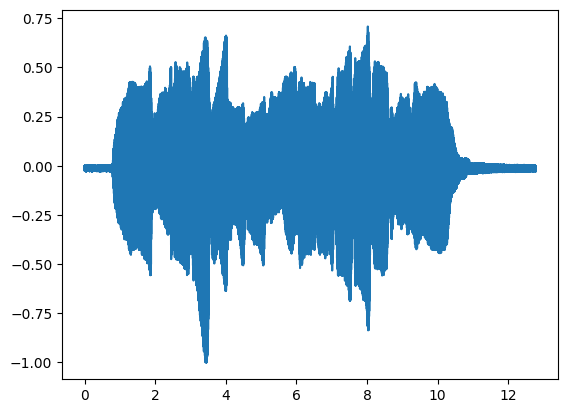

In [5]:
wave = thinkdsp.read_wave(filename=filename)
wave.normalize()
wave.plot()

Выделим из объекта Wave сегмент длиной в 0.5 с.

In [6]:
segment: thinkdsp.Wave = wave.segment(start=1.2, duration=0.5)
segment.make_audio()

Построим график сегмента.

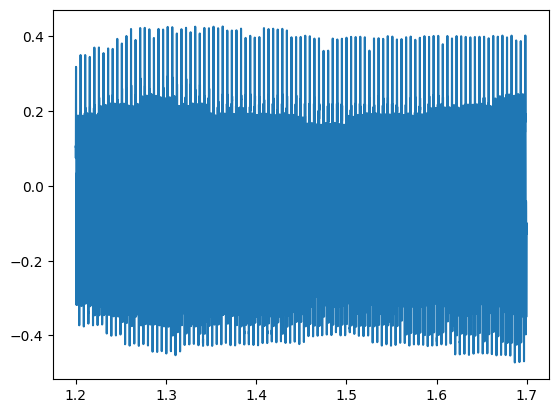

In [7]:
segment.plot()

Построим спектр полученного сегмента. На сегменте виднен максимум амплитуды в районе 400 Гц -- основной тон. Из открытых источников узнаем, что нота соль имеет частоту в 391.995 Гц. Судя по всему, в данном сегменте играется именно эта нота.

Помимо основного тона, на спектре также выделяется множество гармоник (и прочих обертонов). Основной тон (нота соль), гармоники, а также прочие обертоны образуют тембр, который определяется множеством факторов (материал и форма музыкального инструмента, материал струн, материал смычка, форма помещения и проч.)

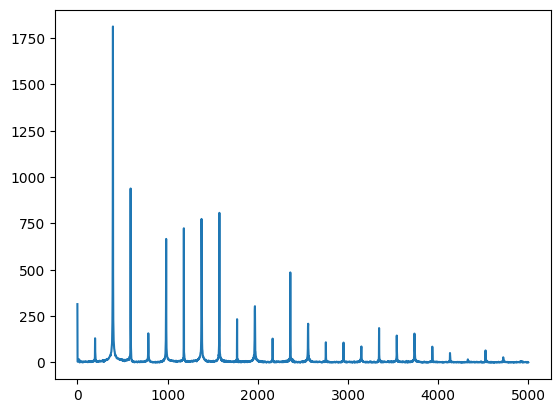

In [8]:
spectrum: thinkdsp.Spectrum = segment.make_spectrum()
spectrum.plot(high=5000)

Узнаем, чему равна частота с наивысшей амплитудой. Полученное всего значение (394.0 Гц) примерно на 2 Гц отличается от высоты ноты соль.

In [9]:
spectrum.peaks()[0]

(np.float64(1812.3774838643774), np.float64(394.0))

Отфильтруем обертона спектра, оставив только те, чьи частоты не превышают 1000. Получим новый спектр. Его звук стал больше напоминать синтезированный звук, тембр скрипки безвозвратно утрачен. Тем не менее, основной тон остался прежним.

In [10]:
spectrum_new: thinkdsp.Spectrum = spectrum.copy()
spectrum_new.low_pass(1000)
spectrum_new.make_wave().make_audio()

Построим полученный спектр, чтобы убедиться, что фильтрация произошла успешно.

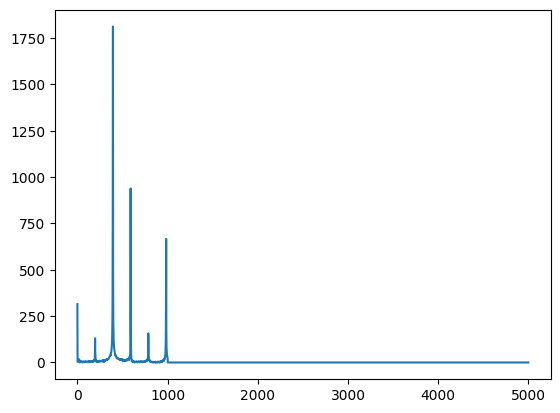

In [11]:
spectrum_new.plot(high=5000)

## Упражнение 1.3

Создадим сложный сигнал на основе синусоидального и косинусоидального сигналов.

In [12]:
sin_sig = thinkdsp.SinSignal(freq=554.36, amp=1.0, offset=0)
cos_sig = thinkdsp.CosSignal(freq=349.23, amp=0.6, offset=0)
mix1: thinkdsp.Signal = sin_sig + cos_sig
mix1_wave: thinkdsp.Wave = mix1.make_wave(duration=0.5, start=0, framerate=11025)
mix1_wave.make_audio()

Построим график небольшого сегмента полученного сигнала.

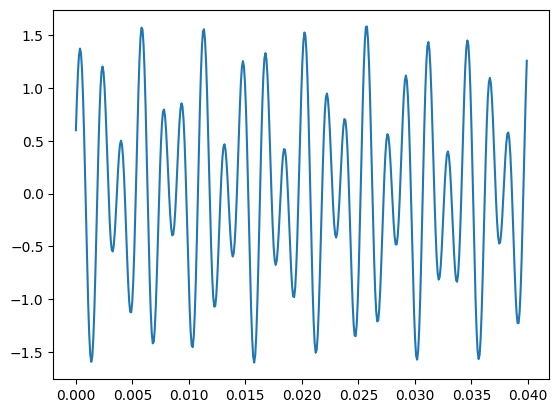

In [13]:
mix1_wave.segment(start=0, duration=0.04).plot()

Также построим спектр сигнала. На нём видно 2 отдельных тона с заданными частотами.

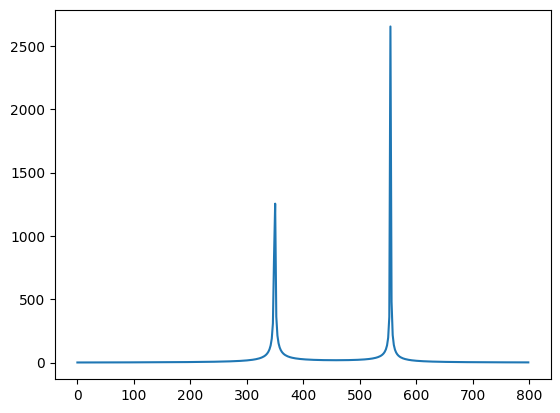

In [14]:
mix1_spectrum: thinkdsp.Spectrum = mix1_wave.make_spectrum()
mix1_spectrum.plot(high=800)

Добавим к сигналу частотную компоненту, не кратную двум исходным.

In [15]:
mix2 = mix1 + thinkdsp.SinSignal(freq=440, amp=1, offset=0)

Прослушаем полученный сигнал. В полученном звуке чувствуется некоторая напряженность.



In [16]:
mix2_wave: thinkdsp.Wave = mix2.make_wave(duration=0.5, start=0, framerate=11025)
mix2_wave.make_audio()

Построим спектр нового сигнала с частотной компонентой, не кратной основным. На графике появился новый пик с заданной частотой, однако видно, что его симметрия нарушена.

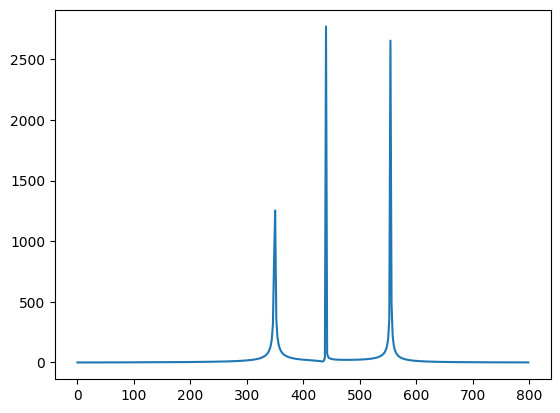

In [17]:
mix2_spectrum: thinkdsp.Spectrum = mix2_wave.make_spectrum()
mix2_spectrum.plot(high=800)

## Упражнение 1.4

Создадим функцию stretch, способную ускорять или замедлять сигнал. Для этого умножим NumPy-массив, доступный из атрибута ts, на k, а значение framerate поделим на k, так как при увеличении скорости в 2 раза требуется в 2 раза меньше "кадров" и наоборот.

In [18]:
def stretch(w: thinkdsp.Wave, k: float) -> thinkdsp.Wave:
  """
    Растягивает объект типа Wave в k раз.
  """
  w.ts *= k
  w.framerate /= k

Протестируем функцию stretch на аудиофайле со скрипкой.

In [19]:
wv: thinkdsp.Wave = thinkdsp.read_wave(filename='./audio/violin-g-major.wav')
wv.make_audio()

Полученный файл имеет увелченную скорость и увеличенный тон.

(Если полученный файл не проигрывается в браузере, его следует сохранить и открыть в локальном проигрывателе.)

In [20]:
stretch(wv, 0.5)
wv.make_audio()